In [33]:
from dataset import Dataset
import vectorbt as vbt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')
vbt.settings.set_theme('dark')

In [87]:
TICKER = 'BTCUSDT'
data_binance = Dataset().get_data(days=1000, ticker=TICKER, ts='1d')

In [88]:
data = data_binance.copy()

### Define a grid

In [89]:
grid = np.arange(10, 250, 10)

### Combination calculation

In [90]:
fast, slow = vbt.MA.run_combs(
    data['close'],
    window=grid,
    r=2,
    short_names=['fast', 'low'])
entries = fast.ma_above(slow, crossover=True)
exits = fast.ma_below(slow, crossover=True)
pf_kwargs = dict(size=np.inf, fees=0.001, freq='1h')
pf = vbt.Portfolio.from_signals(
    data['close'],
    entries,
    exits,
    **pf_kwargs
)


### Building a graph of backtest results

<AxesSubplot:xlabel='time'>

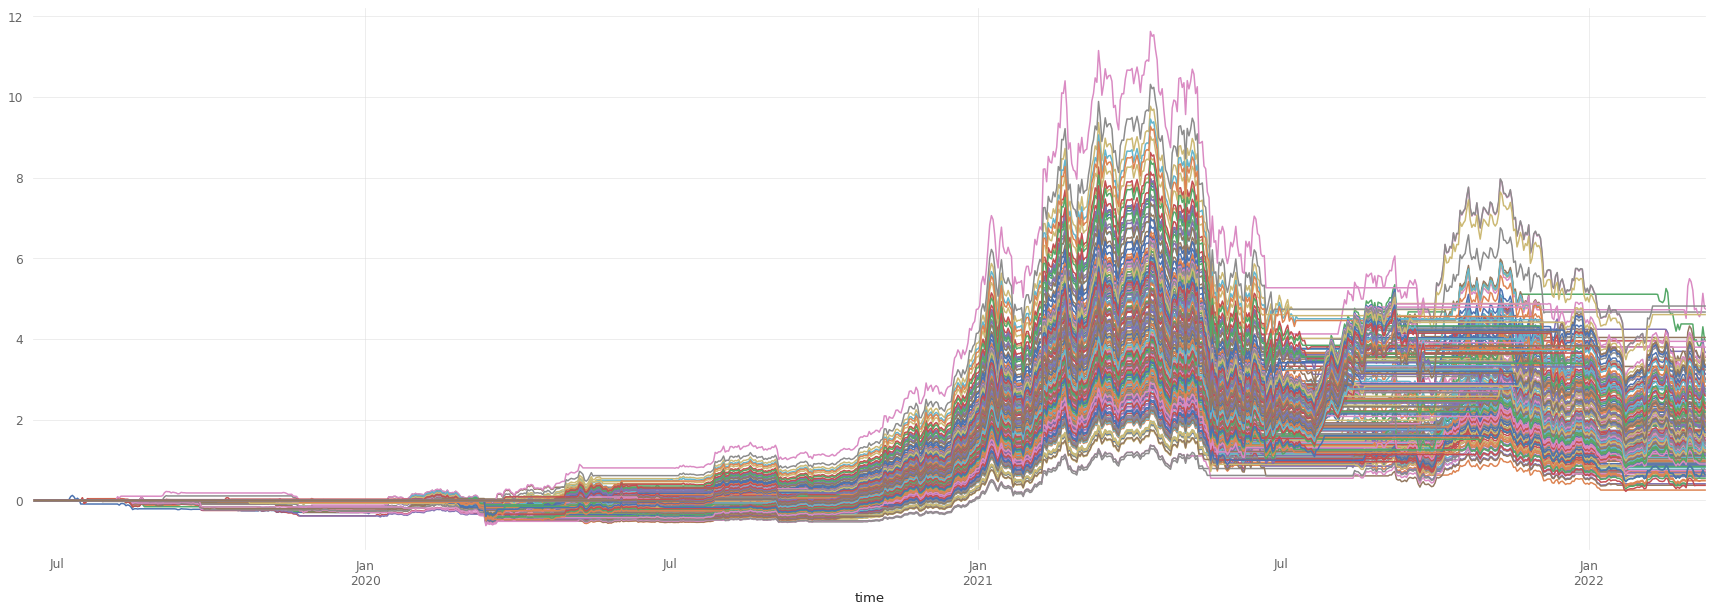

In [91]:
pf.cumulative_returns().plot(figsize=(30, 10), legend=False)

### Build a heat map of the best parameters

In [92]:
pf.total_return().vbt.heatmap().show()

In [93]:
returns = pf.total_return()
returns = pd.DataFrame(returns)
returns.idxmax()

total_return    (110, 140)
dtype: object

### Making a strategy based on the best parameters

In [94]:
fast = vbt.MA.run(data['close'], 110, short_name='fast')
slow = vbt.MA.run(data['close'], 140, short_name='slow')

entries = fast.ma_above(slow, crossover=True)
exits = fast.ma_below(slow, crossover=True)
pf = vbt.Portfolio.from_signals(data['close'], entries, exits, fees=0.001)

In [95]:
pf.plot(height=400, width=1300).show()

In [96]:
pf.stats()

Start                         2019-06-16 00:00:00
End                           2022-03-12 00:00:00
Period                         1001 days 00:00:00
Start Value                                 100.0
End Value                               581.64438
Total Return [%]                        481.64438
Benchmark Return [%]                   344.966454
Max Gross Exposure [%]                      100.0
Total Fees Paid                          2.353391
Max Drawdown [%]                        58.819603
Max Drawdown Duration           332 days 00:00:00
Total Trades                                    4
Total Closed Trades                             4
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                100.0
Best Trade [%]                         255.506002
Worst Trade [%]                          0.336318
Avg Winning Trade [%]                    79.56216
Avg Losing Trade [%]                          NaN
